In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from ExKMCbundle.ExKMC.Tree import Tree
from ExKMCbundle.notebooks.utils import plot_tree_boundary, plot_kmeans
from utils import Mean_Split
%matplotlib inline

In [37]:
n = 100
d = 2
k = 2

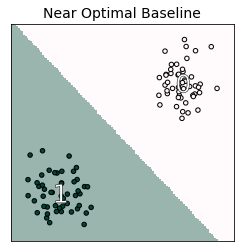

In [38]:
X, _ = make_blobs(n_samples=n, n_features=d, centers=k)
kmeans = KMeans(k)
kmeans.fit(X)

plot_kmeans(kmeans, X)

[{'Split point': array([ 2.4037217 , -5.09405773]), 'Cost': 121.44324113011547, 'Dimension of the split': 0, 'Means': [array([ 0.54954198, -4.21948853]), array([7.64257552, 2.27531827])]}]


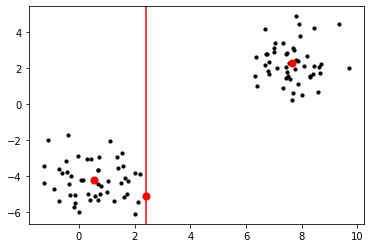

In [39]:
teste = Mean_Split(X, dims=d, n_clusters=k)
teste.find_all_splits()
teste.plot_optimal_split()

In [40]:
tree = Tree(k=k, max_leaves=2*k) 

prediction = tree.fit_predict(X, kmeans=kmeans)

# # Tree plot saved to filename
tree.plot('test')

d:\PUC\2022.1\improved-dollop\TCC\ExKMCbundle\notebooks\utils.py:82: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([x[0] for x in mistakes], [x[1] for x in mistakes], marker='x', c='red', s=60, edgecolors='black', cmap=cmap)


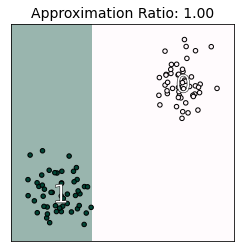

In [41]:
plot_tree_boundary(tree, d, X, kmeans, plot_mistakes=True)